# 1. 지도학습

## SVM

In [ ]:
# SVM 기반 삼성전자 이상탐지 예제

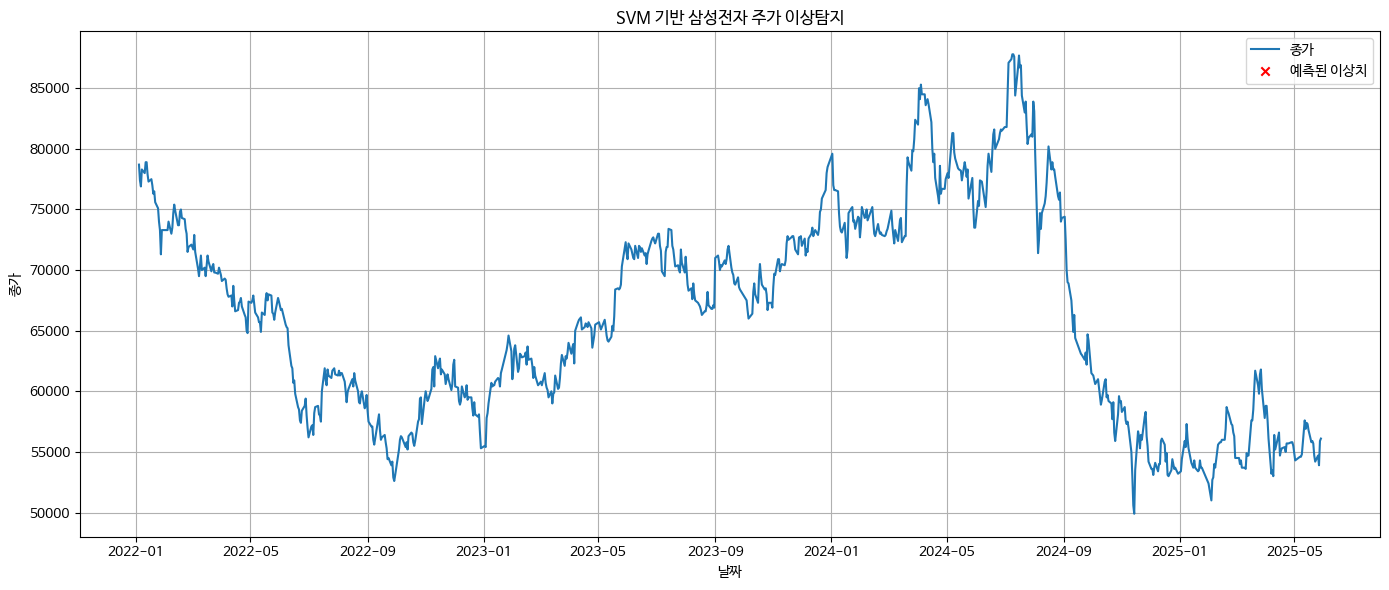

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. 삼성전자 주가 데이터 수집
df = stock.get_market_ohlcv_by_date("2022-01-01", "2025-05-31", "005930")[['종가']].copy()
df.dropna(inplace=True)

# 2. 로그 수익률 계산 및 이상치 라벨링
df['log_return'] = np.log(df['종가'] / df['종가'].shift(1))
df['return_shift'] = df['log_return'].shift(-1)
df.dropna(inplace=True)

# 3. 상/하위 2.5% 구간을 이상치로 정의
# quantile(0.975)와 quantile(0.025):
# 수익률 분포의 상위 2.5%와 하위 2.5% 지점을 계산합니다.
# 즉, 상위 2.5%는 급등한 날, 하위 2.5%는 급락한 날을 의미합니다.
# 이 구간 바깥의 값들을 "이상치"로 간주합니다.
    
upper = df['return_shift'].quantile(0.975)
lower = df['return_shift'].quantile(0.025)
df['label'] = ((df['return_shift'] > upper) | (df['return_shift'] < lower)).astype(int)

# 4. 스케일링 및 훈련/테스트 데이터 분할
X = df[['log_return']]
y = df['label']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. SVM 모델 학습
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

# 6. 전체 예측 및 시각화
df['predicted'] = model.predict(X_scaled)

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['종가'], label='종가')
plt.scatter(df.index[df['predicted'] == 1], df['종가'][df['predicted'] == 1], color='red', marker='x', label='예측된 이상치')
plt.title("SVM 기반 삼성전자 주가 이상탐지")
plt.xlabel("날짜")
plt.ylabel("종가")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## RandomForest

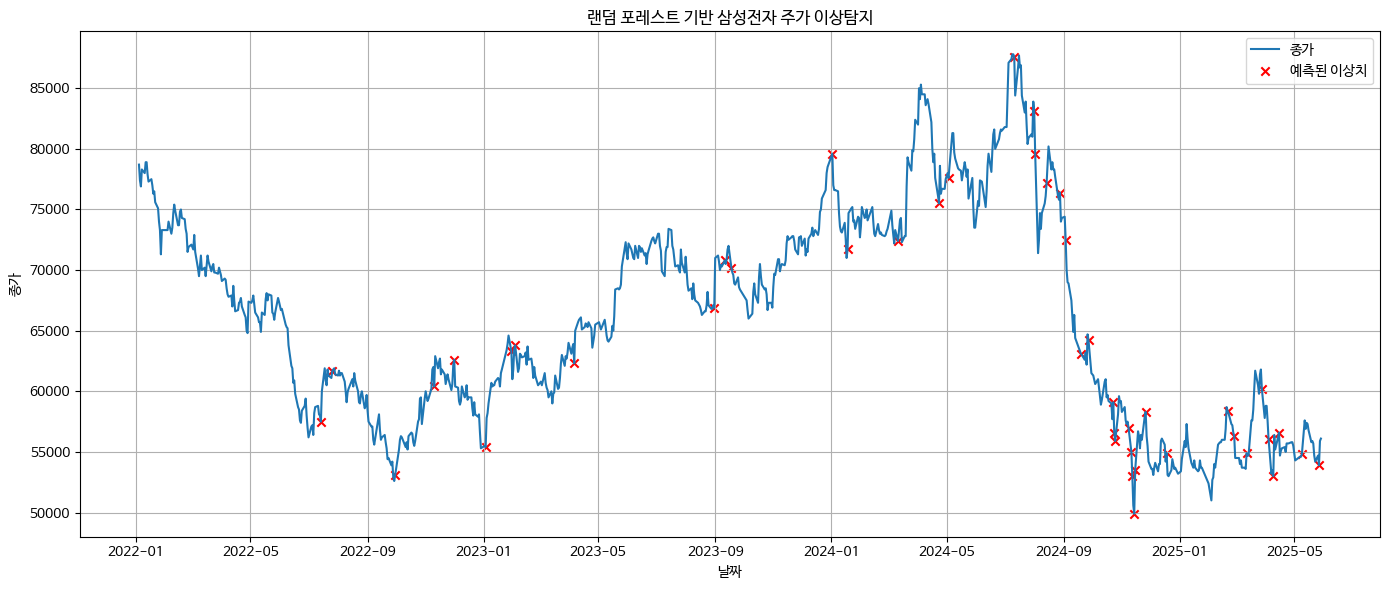

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 삼성전자 종가 데이터 수집
df = stock.get_market_ohlcv_by_date("2022-01-01", "2025-05-31", "005930")[['종가']].copy()
df.dropna(inplace=True)

# 로그 수익률 및 레이블 생성
df['log_return'] = np.log(df['종가'] / df['종가'].shift(1))
df['return_shift'] = df['log_return'].shift(-1)
df.dropna(inplace=True)

# 상/하위 2.5%를 이상치로 간주한 라벨 생성
upper = df['return_shift'].quantile(0.975)
lower = df['return_shift'].quantile(0.025)
df['label'] = ((df['return_shift'] > upper) | (df['return_shift'] < lower)).astype(int)

# 피처 스케일링
X = df[['log_return']]
y = df['label']
X_scaled = StandardScaler().fit_transform(X)

# 학습 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
df['predicted'] = model.predict(X_scaled)

# 결과 시각화
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['종가'], label='종가')
plt.scatter(df.index[df['predicted'] == 1], df['종가'][df['predicted'] == 1],
            color='red', label='예측된 이상치', marker='x')
plt.title("랜덤 포레스트 기반 삼성전자 주가 이상탐지")
plt.xlabel("날짜")
plt.ylabel("종가")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Autoencoder 

In [ ]:
# Autoencoder 구조는 1차원 입력에 대해 인코딩/디코딩을 반복하여 재구성 오차를 기반으로 이상 탐지를 수행합니다.
# 이상치 기준은 재구성 오차(MSE)의 상위 2.5%입니다.
# 데이터는 log_return을 기준으로 전처리합니다.

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3903
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8177
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7149
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.5230
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4502
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5357
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.4878
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.3609
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4922
Epoch 10/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3975
Epoch 11/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4104
Epoch 12/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.2674
Epoch 13/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 0.3803
Epoch 14/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3986
Epoch 15/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.2118
Epoch 1

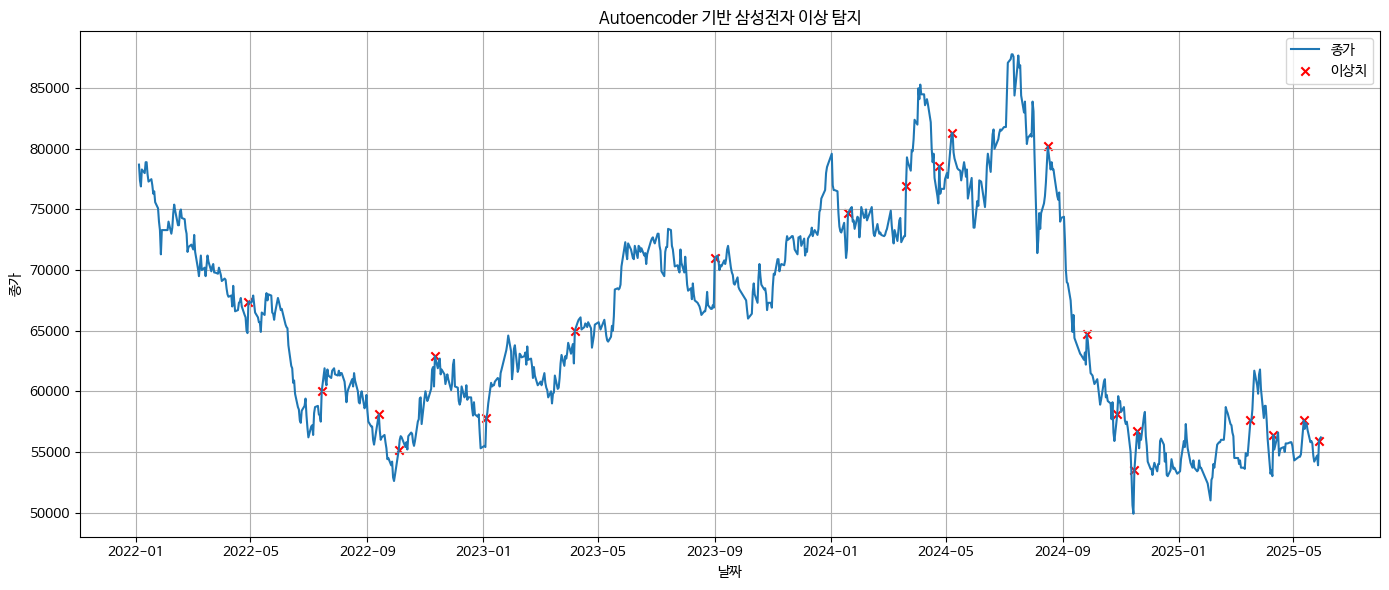

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. 삼성전자 주가 데이터 수집
df = stock.get_market_ohlcv_by_date("2022-01-01", "2025-05-31", "005930")[['종가']].copy()
df.dropna(inplace=True)

# 2. 로그 수익률 계산
df['log_return'] = np.log(df['종가'] / df['종가'].shift(1))
df.dropna(inplace=True)

# 3. 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['log_return']])

# 4. Autoencoder 모델 정의
model = Sequential([
    Dense(8, activation='relu', input_shape=(1,)),
    Dense(4, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 5. 학습
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)
model.fit(X_train, X_train, epochs=50, batch_size=16, verbose=1)

# 6. 재구성 오차 계산 및 이상 탐지
reconstructions = model.predict(X_scaled)
mse = np.mean(np.power(X_scaled - reconstructions, 2), axis=1)
threshold = np.percentile(mse, 97.5)  # 상위 2.5%를 이상치로 간주
df['anomaly'] = mse > threshold

# 7. 시각화
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['종가'], label='종가')
plt.scatter(df.index[df['anomaly']], df['종가'][df['anomaly']], color='red', label='이상치', marker='x')
plt.title("Autoencoder 기반 삼성전자 이상 탐지")
plt.xlabel("날짜")
plt.ylabel("종가")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 비지도학습

## IsolationForest 기반 이상 탐지 코드 (삼성전자)

In [ ]:
# 변환	로그 수익률을 이상 탐지 기준 피처로 사용
# 모델	IsolationForest: 데이터 분포에서 고립된 점(이상치)을 트리 기반 방식으로 판별

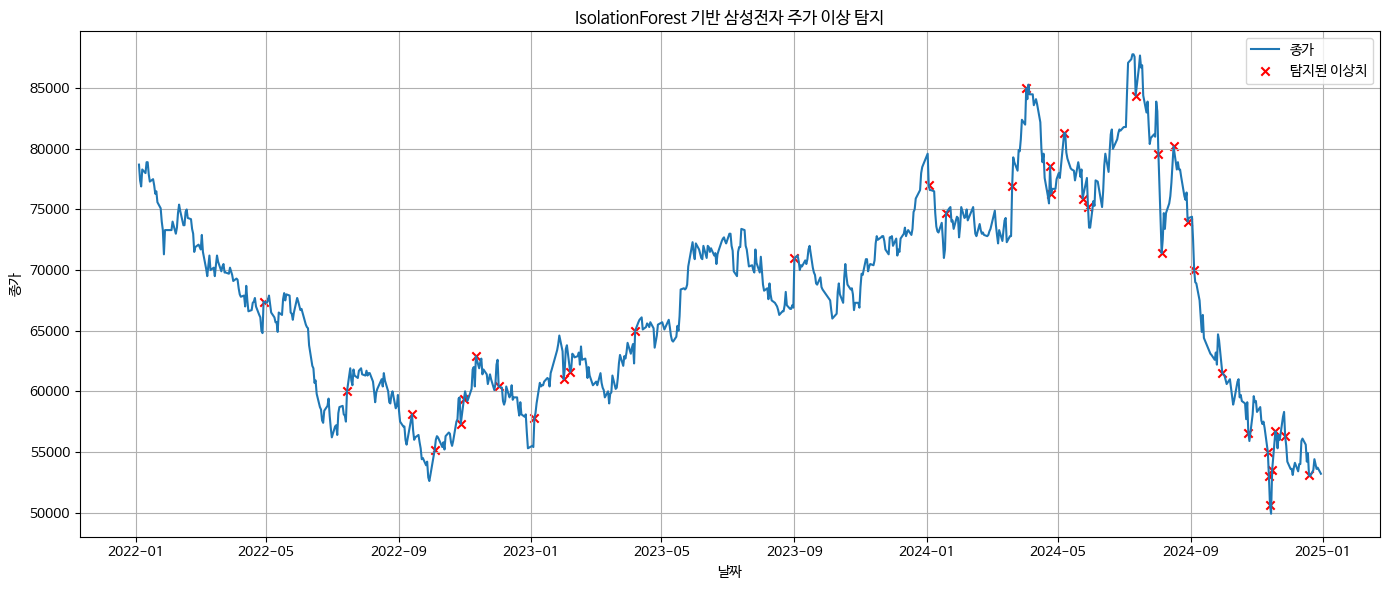

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# 1. 삼성전자 주가 데이터 수집
df = stock.get_market_ohlcv_by_date("2022-01-01", "2024-12-31", "005930")[['종가']].copy()
df.dropna(inplace=True)

# 2. 로그 수익률 계산
df['log_return'] = np.log(df['종가'] / df['종가'].shift(1))
df.dropna(inplace=True)

# 3. 피처 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['log_return']])

# 4. IsolationForest 모델 정의 및 학습
# contamination=0.05 : 전체 샘플 중 5%를 이상치로 간주하라는 의미입니다.
# 즉, 알고리즘이 자동으로 전체 샘플의 상위/하위 5%를 이상치로 판단합니다.
# random_state=42 : 랜덤성 제어용 시드 값입니다. 실행할 때마다 동일한 결과가 나오도록 고정합니다.
    # fit_predict(X_scaled) : 입력 데이터(X_scaled)를 기반으로 모델을 학습(fit) 하고, 이상치 예측 결과를 반환합니다.

iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = iso_forest.fit_predict(X_scaled)

# 5. 이상치 여부를 1/0으로 변환 (1=정상, -1=이상)
# df['anomaly'] :  1 또는 -1로 구성된 이상치 탐지 결과를 원본 데이터프레임에 새로운 열로 추가합니다.

df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

# 6. 시각화
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['종가'], label='종가')
plt.scatter(df.index[df['anomaly'] == 1], df['종가'][df['anomaly'] == 1],
            color='red', label='탐지된 이상치', marker='x')
plt.title("IsolationForest 기반 삼성전자 주가 이상 탐지")
plt.xlabel("날짜")
plt.ylabel("종가")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## IsolationForest 이상치 점수 계산 예제

In [ ]:
# 이상치 점수로 판단하는 사례

               종가  log_return  anomaly_score  is_outlier
날짜                                                      
2024-08-05  71400   -0.108716      -0.170870          -1
2024-11-15  53500    0.069661      -0.159266          -1
2023-09-01  71000    0.059481      -0.137481          -1
2024-11-18  56700    0.058093      -0.133421          -1
2024-11-13  50600   -0.046340      -0.128482          -1
2024-03-20  76900    0.054790      -0.124868          -1
2024-10-24  56600   -0.043222      -0.111424          -1
2024-09-30  61500   -0.042966      -0.109462          -1
2024-08-02  79600   -0.043031      -0.109462          -1
2024-05-07  81300    0.046579      -0.068496          -1


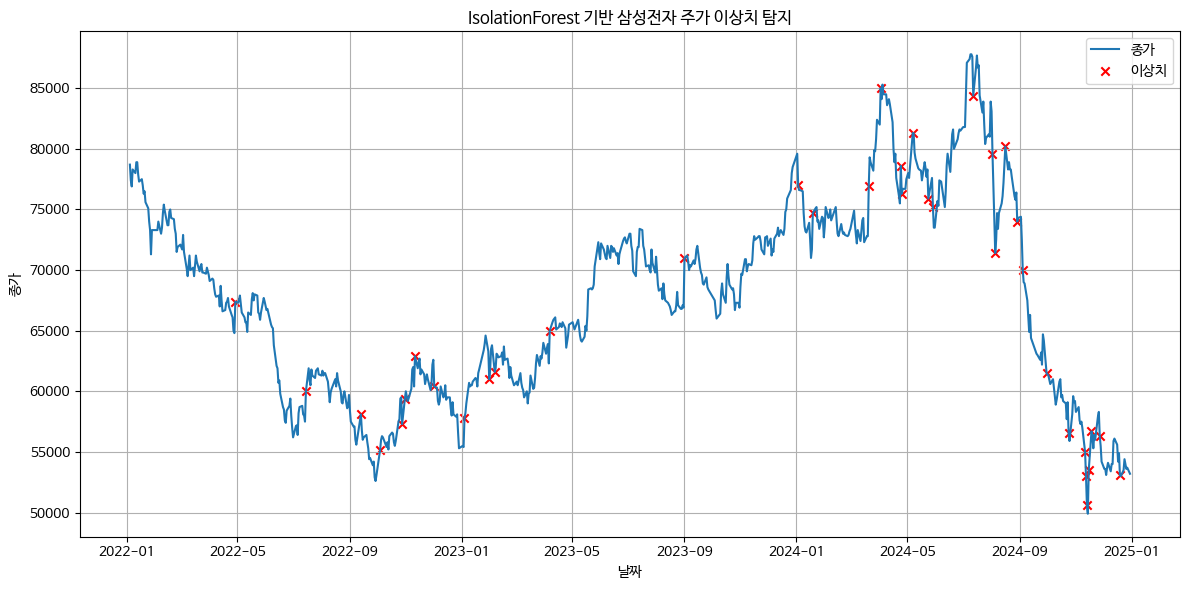

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock
from sklearn.ensemble import IsolationForest

# 1. 데이터 수집
df = stock.get_market_ohlcv_by_date("2022-01-01", "2024-12-31", "005930")[['종가']].copy()
df.dropna(inplace=True)

# 2. 로그 수익률 계산
df['log_return'] = np.log(df['종가'] / df['종가'].shift(1))
df.dropna(inplace=True)

# 3. IsolationForest 적용
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(df[['log_return']])
df['anomaly_score'] = model.decision_function(df[['log_return']])
df['is_outlier'] = model.predict(df[['log_return']])

# 4. 이상치 점수가 낮은 순으로 정렬하여 출력
sorted_df = df.sort_values(by='anomaly_score').copy()
print(sorted_df[['종가', 'log_return', 'anomaly_score', 'is_outlier']].head(10))  # 상위 10개

# 5. 이상치 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['종가'], label='종가')
plt.scatter(df[df['is_outlier'] == -1].index,
            df[df['is_outlier'] == -1]['종가'],
            color='red', label='이상치', marker='x')
plt.title("IsolationForest 기반 삼성전자 주가 이상치 탐지")
plt.xlabel("날짜")
plt.ylabel("종가")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# anomaly_score: 이상치일 가능성이 높을수록 값이 작아짐 (IsolationForest 특성).
# is_outlier: -1은 이상치, 1은 정상치.
# sort_values(by='anomaly_score'): 점수가 가장 낮은 순서대로 정렬하여 가장 의심스러운 이상치를 확인합니다.

## K-Means 기반 이상 탐지 코드 (삼성전자 주가)

In [ ]:
# 이상치 판단 기준	평균 수익률이 가장 낮은 클러스터를 이상치로 간주
# 장점	간단하고 직관적이며, 밀도 기반 이상치가 없을 때도 유용
# 단점	이상치가 뚜렷하지 않은 경우 판단이 어려울 수 있음

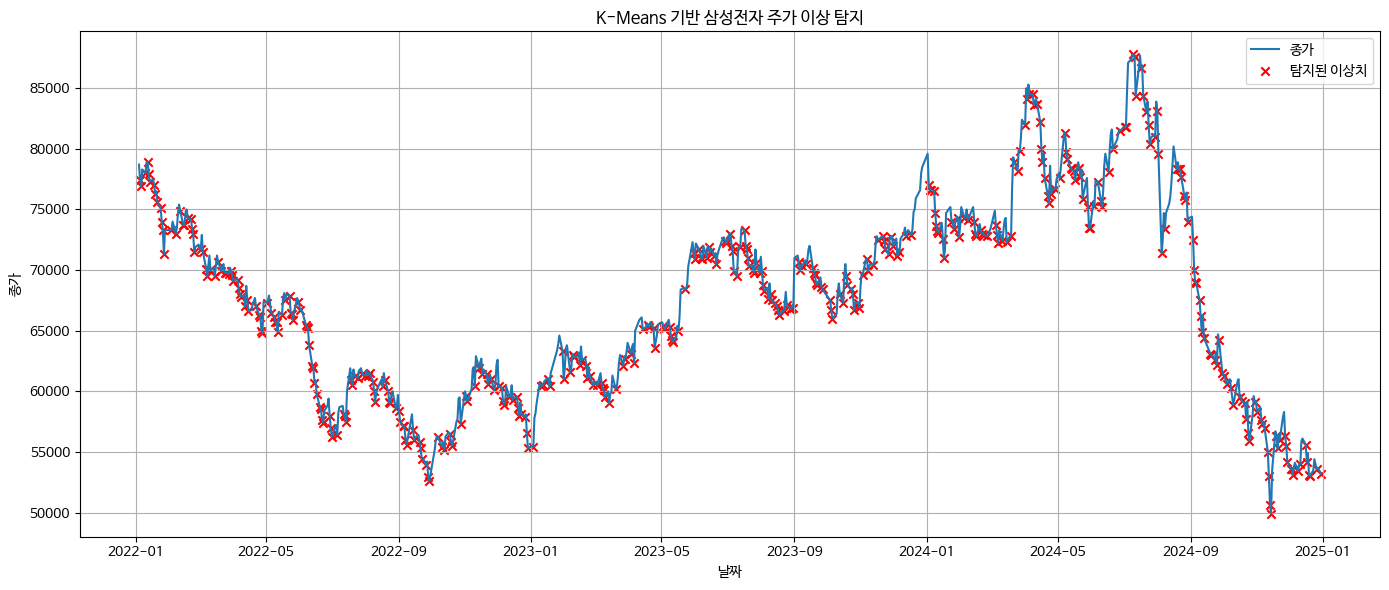

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. 삼성전자 주가 데이터 수집
df = stock.get_market_ohlcv_by_date("2022-01-01", "2024-12-31", "005930")[['종가']].copy()
df.dropna(inplace=True)

# 2. 로그 수익률 계산
df['log_return'] = np.log(df['종가'] / df['종가'].shift(1))
df.dropna(inplace=True)

# 3. 피처 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['log_return']])

# 4. KMeans 클러스터링 (클러스터 수는 2개로 가정)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 5. 이상 클러스터 판별: 평균 수익률이 낮은 쪽을 이상치로 가정
cluster_means = df.groupby('cluster')['log_return'].mean()
outlier_cluster = cluster_means.idxmin()
df['anomaly'] = (df['cluster'] == outlier_cluster).astype(int)

# 6. 시각화
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['종가'], label='종가')
plt.scatter(df.index[df['anomaly'] == 1], df['종가'][df['anomaly'] == 1],
            color='red', label='탐지된 이상치', marker='x')
plt.title("K-Means 기반 삼성전자 주가 이상 탐지")
plt.xlabel("날짜")
plt.ylabel("종가")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## PCA 기반 이상탐지 코드 (PyKrx + IsolationForest 사용)

In [ ]:
# PCA 차원 축소	고차원 주가 데이터를 2D로 줄여 이상 탐지 효율 향상
# Isolation Forest	고립기반 이상 탐지 알고리즘
# 시각화	종가 시계열 위에 이상치를 빨간 x로 표시

C:\Users\JYB\AppData\Local\Temp\ipykernel_6416\3097195644.py:42: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


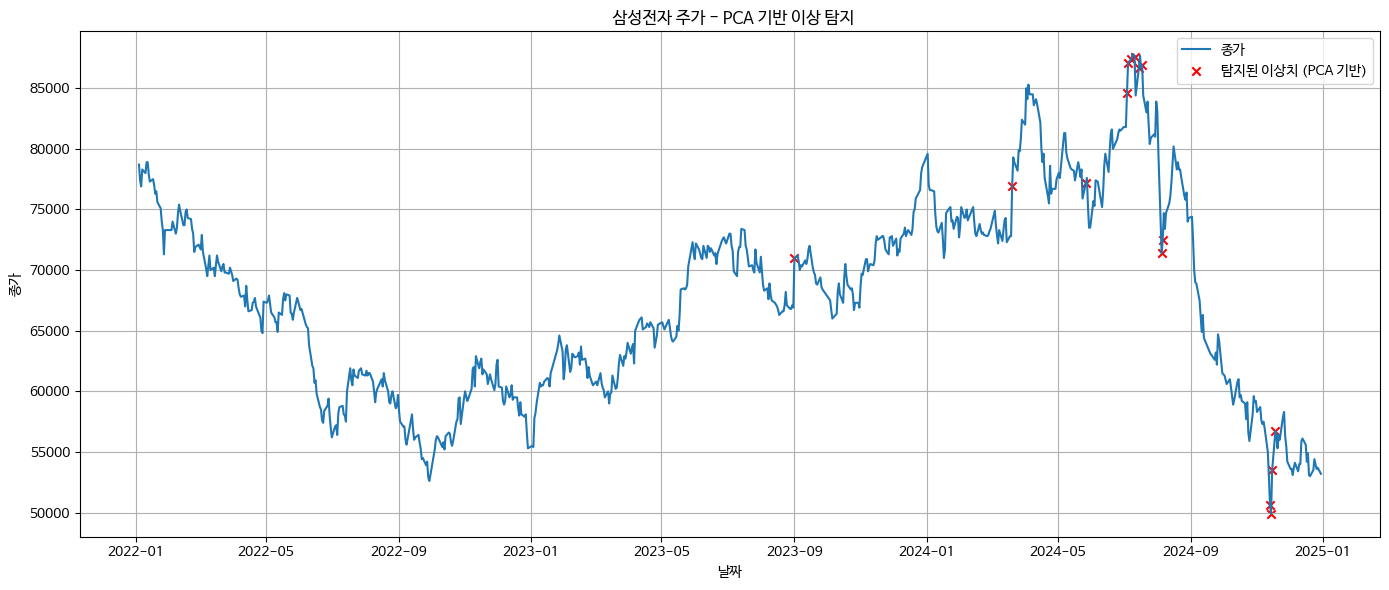

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# 1. 삼성전자 주가 데이터 수집
df = stock.get_market_ohlcv_by_date("2022-01-01", "2024-12-31", "005930")[['시가', '고가', '저가', '종가', '거래량']]
df.dropna(inplace=True)

# 2. 파생 변수 추가
df['log_return'] = np.log(df['종가'] / df['종가'].shift(1))
df['high_low_range'] = df['고가'] - df['저가']
df.dropna(inplace=True)

# 3. 스케일링
features = ['시가', '고가', '저가', '종가', '거래량', 'log_return', 'high_low_range']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# 4. PCA 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. 이상 탐지 모델 (IsolationForest)
clf = IsolationForest(contamination=0.02, random_state=42)
df['anomaly'] = clf.fit_predict(X_pca)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})  # 1: 이상치

# 6. 시각화
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['종가'], label='종가')
plt.scatter(df.index[df['anomaly'] == 1], df['종가'][df['anomaly'] == 1],
            color='red', label='탐지된 이상치 (PCA 기반)', marker='x')
plt.title("📉 삼성전자 주가 - PCA 기반 이상 탐지")
plt.xlabel("날짜")
plt.ylabel("종가")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
## t-SNE + KMeans 기반 이상탐지

In [ ]:
# 데이터 수집	pykrx로 삼성전자 종가 수집
# 피처 생성	로그수익률, 이동평균, 수익률 표준편차
# 정규화	StandardScaler 사용
# 차원 축소	t-SNE로 2차원 임베딩
# 이상탐지	KMeans로 클러스터링 후 소수 클러스터를 이상치로 간주
# 시각화	시계열 상과 임베딩 공간에서 이상치 표시

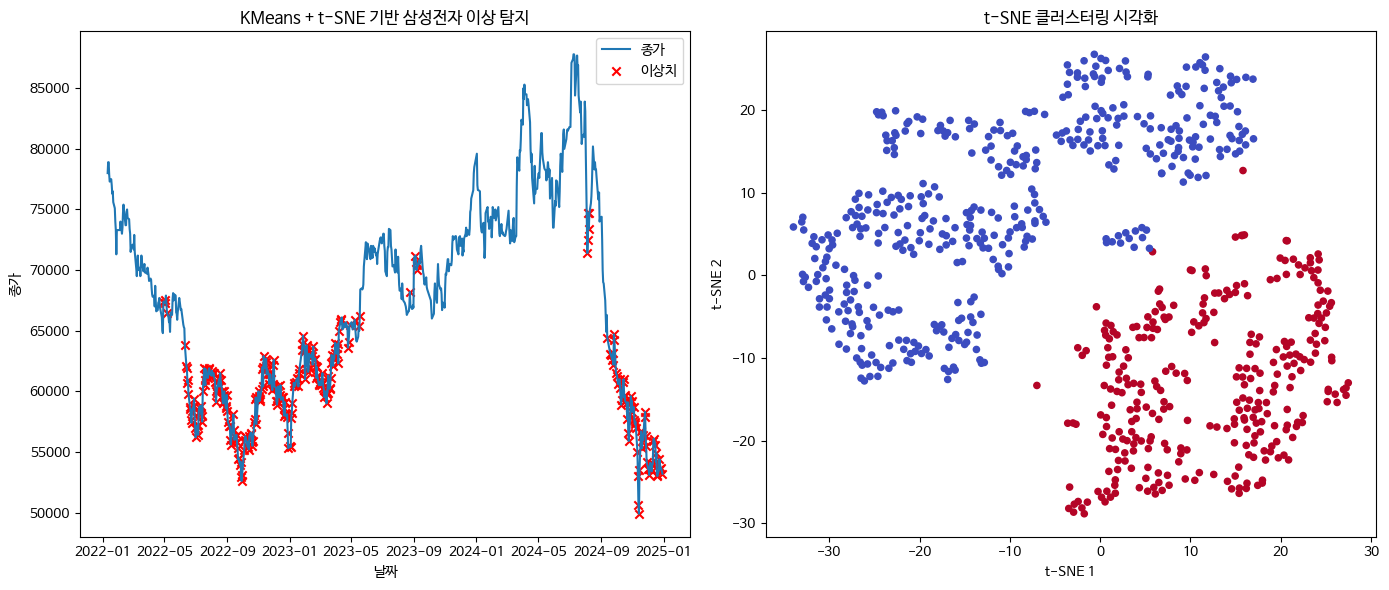

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# 1. 삼성전자 종가 데이터 수집
df = stock.get_market_ohlcv_by_date("2022-01-01", "2024-12-31", "005930")[['종가']].copy()
df.dropna(inplace=True)

# 2. 파생 변수 생성
df['log_return'] = np.log(df['종가'] / df['종가'].shift(1))
df['ma_5'] = df['종가'].rolling(window=5).mean()
df['std_5'] = df['log_return'].rolling(window=5).std()
df.dropna(inplace=True)

# 3. 정규화
features = df[['log_return', 'ma_5', 'std_5']]
scaled_data = StandardScaler().fit_transform(features)

# 4. t-SNE + KMeans 기반 이상치 탐지
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(tsne_results)

df['tsne_x'] = tsne_results[:, 0]
df['tsne_y'] = tsne_results[:, 1]
df['cluster'] = clusters

# 5. 이상치 판단: 소수 집단을 이상치로
anomaly_label = df['cluster'].value_counts().idxmin()
df['anomaly_tsne'] = (df['cluster'] == anomaly_label).astype(int)

# 6. 시각화
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(df.index, df['종가'], label='종가')
plt.scatter(df.index[df['anomaly_tsne'] == 1], df['종가'][df['anomaly_tsne'] == 1],
            color='red', marker='x', label='이상치')
plt.title("KMeans + t-SNE 기반 삼성전자 이상 탐지")
plt.xlabel("날짜")
plt.ylabel("종가")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(df['tsne_x'], df['tsne_y'], c=df['anomaly_tsne'], cmap='coolwarm', s=20)
plt.title("t-SNE 클러스터링 시각화")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")

plt.tight_layout()
plt.show()
